## Vendas de mercadorias

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

%matplotlib inline

# Etapa 1 -  Qualidade dos dados

In [50]:
df = pd.read_csv('simula_vendas_merc.csv', sep=";", encoding='latin1')

In [51]:
df.head()

,ANO,MES,DIA,SEXO,PERIODO,CODIGO,DESCRICAO,UNIDADE_MEDIDA,CATEGORIA,PRECO_UNITARIO,QTD_VENDIDAS,VALOR_VENDIDO
0,2015,3,3,F,MANHÃ,10000-V-13994,CREAM CHEESE ECILA 100G TRADICIONAL,UN,9016040,1.46,5.00,7.30
1,2014,5,8,M,MANHÃ,1003-X-02801,CEBOLA MIUDA BURBO KG,KG,91013070,0.93,8.95,8.32
2,2013,10,10,M,MANHÃ,1006-J-19160,ACETATO BEIRA ALTA OLEO BANANA 90ML,UN,93935192,1.23,6.00,7.38
3,2015,1,14,F,MANHÃ,1007-Q-08886,REQUEIJAO CATUPIRY 200G ERVAS FINAS,UN,9016040,3.16,3.00,9.48
4,2014,11,15,F,TARDE,1009-D-17623,CALDO ARISCO 57G COSTELA,UN,11014012,0.53,13.00,6.89


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40549 entries, 0 to 40548
Data columns (total 12 columns):
ANO               40549 non-null int64
MES               40549 non-null int64
DIA               40549 non-null int64
SEXO              40549 non-null object
PERIODO           40549 non-null object
CODIGO            40549 non-null object
DESCRICAO         40549 non-null object
UNIDADE_MEDIDA    40549 non-null object
CATEGORIA         40549 non-null int64
PRECO_UNITARIO    40549 non-null object
QTD_VENDIDAS      40549 non-null object
VALOR_VENDIDO     40549 non-null object
dtypes: int64(4), object(8)
memory usage: 3.7+ MB


#### Precisamos converte os campos numéricos em float

In [53]:
for campo in ('PRECO_UNITARIO','VALOR_VENDIDO','QTD_VENDIDAS'):
    df[campo] = df[campo].apply(lambda c: int(str(c).replace('.',''))/100)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40549 entries, 0 to 40548
Data columns (total 12 columns):
ANO               40549 non-null int64
MES               40549 non-null int64
DIA               40549 non-null int64
SEXO              40549 non-null object
PERIODO           40549 non-null object
CODIGO            40549 non-null object
DESCRICAO         40549 non-null object
UNIDADE_MEDIDA    40549 non-null object
CATEGORIA         40549 non-null int64
PRECO_UNITARIO    40549 non-null float64
QTD_VENDIDAS      40549 non-null float64
VALOR_VENDIDO     40549 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 3.7+ MB


# Etapa 2 - Exploração dos Dados

In [54]:
df.head()

,ANO,MES,DIA,SEXO,PERIODO,CODIGO,DESCRICAO,UNIDADE_MEDIDA,CATEGORIA,PRECO_UNITARIO,QTD_VENDIDAS,VALOR_VENDIDO
0,2015,3,3,F,MANHÃ,10000-V-13994,CREAM CHEESE ECILA 100G TRADICIONAL,UN,9016040,1.46,5.00,7.30
1,2014,5,8,M,MANHÃ,1003-X-02801,CEBOLA MIUDA BURBO KG,KG,91013070,0.93,8.95,8.32
2,2013,10,10,M,MANHÃ,1006-J-19160,ACETATO BEIRA ALTA OLEO BANANA 90ML,UN,93935192,1.23,6.00,7.38
3,2015,1,14,F,MANHÃ,1007-Q-08886,REQUEIJAO CATUPIRY 200G ERVAS FINAS,UN,9016040,3.16,3.00,9.48
4,2014,11,15,F,TARDE,1009-D-17623,CALDO ARISCO 57G COSTELA,UN,11014012,0.53,13.00,6.89


In [55]:
# plot de calor adaptado para verificar dados faltantes
def grafico_dados_faltantes(_df):
    plt.figure(figsize=(15,5))
    return sns.heatmap(_df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

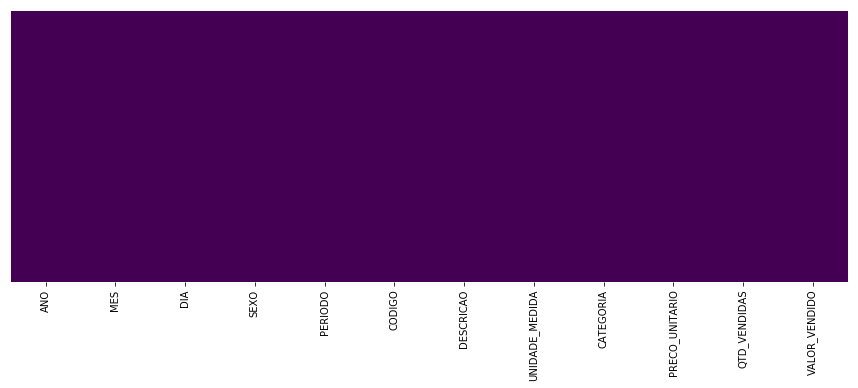

In [56]:
grafico_dados_faltantes(df);

#### Este dataset não tem muito tratamento de dados para realizar, mas podemos fazer uma análise exploratória básica plotando alguns gráficos.

In [122]:
# função para gerar gráfico padrão
def gerar_grafico_padrao(campo, largura=10, altura=6, df = df,titulo='Análise Exploratória',tipo=1):
    """
    1 - sum()
    2 - count()
    """
    
    if tipo == 1:
        ax = df.groupby([campo])['VALOR_VENDIDO'].sum().plot(kind='barh', figsize=(largura, altura), fontsize=13);
    else:
        ax = df[campo].value_counts().plot(kind='barh', figsize=(largura, altura), fontsize=13, );
        
    ax.set_alpha(0.8)
    ax.set_xlabel('Valor Vendido')
    ax.set_title(titulo)
    ax.set_xticks(np.arange(0, 110, 10)*len(df)/100)
    totals = []

    # encontrar os valores e acrescentar à lista
    for i in ax.patches:
        totals.append(i.get_width())
    
    # definir barras individuais usando a lista acima
    total = sum(totals)

    # definir barras individuais usando a lista acima
    for i in ax.patches:
        ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=12, color='dimgrey')

    # invertido para maior no topo
    ax.invert_yaxis()

    return ax

In [57]:
df.columns

Index(['ANO', 'MES', 'DIA', 'SEXO', 'PERIODO', 'CODIGO', 'DESCRICAO',
       'UNIDADE_MEDIDA', 'CATEGORIA', 'PRECO_UNITARIO', 'QTD_VENDIDAS',
       'VALOR_VENDIDO'],
      dtype='object')

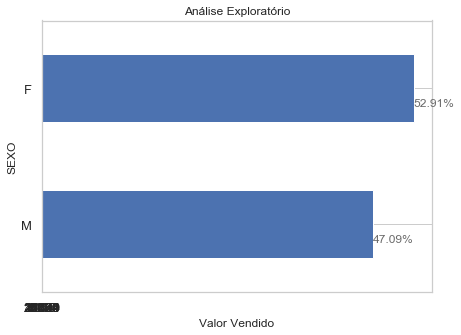

In [91]:
gerar_grafico_padrao('SEXO',largura=7, altura=5);

#### Olha as mulheres comprando mais! Talvez se colocar na frente do caixa produtos femininos, doces entre outras coisas possa ajudar as mulheres comprar

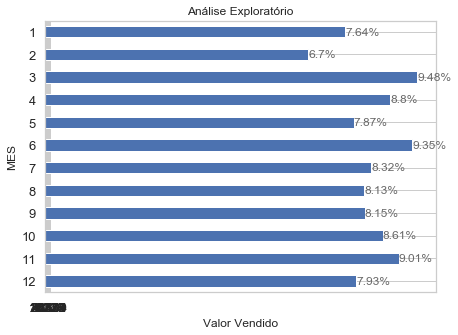

In [85]:
gerar_grafico_padrao('MES',largura=7, altura=5);

#### Estes dados são ficticios mas da para ter uma idéa os meses que mais vende, assim concegue preparar a equipe de compra para fazer um estoque mais inteligênte

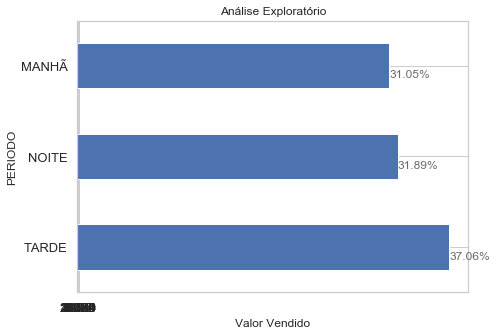

In [86]:
gerar_grafico_padrao('PERIODO',largura=7, altura=5);

#### Com esse gráfico acima pode avaliar o horário que o mercado precisa de mais repositor de mercadorias, caixas, etc..

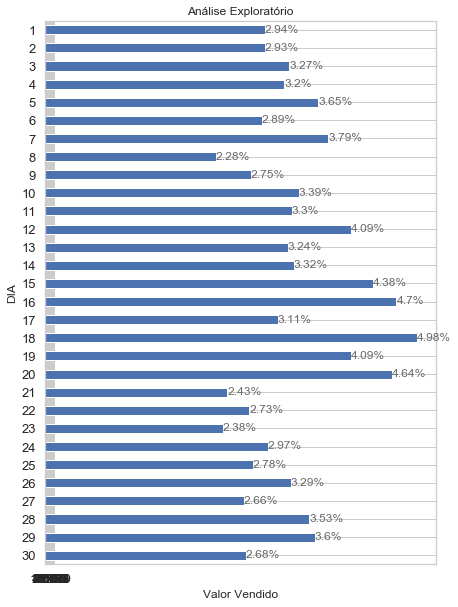

In [89]:
gerar_grafico_padrao('DIA',largura=7, altura=10);

##### Quase 5% das vendas em geral são realizadas no dia 18, esse é dia um de atenção onde deve acontecer o menor número possível de folga para que a força de mão de obra esteja disponível.

##### Em contra partida o dia que menos vende é dia 27, nesse dia poderia realizar degustações, promoções, enfim meios para atrair o consumidor

In [124]:
#gerar_grafico_padrao('DESCRICAO',largura=7, altura=10,tipo=2);

#### Plotei alguns gráficos a realizando uma análise muito superficial desses dados fictícios aqui pode ser extraído muitas coisas ainda exemplo:

1.	O produto que mais vende diariamente e/ou em dias específicos. 
2.	Posicionar melhor mercadorias nas prateleiras e locais estratégicos para que esteja mais acessível. 
3.	Melhorar escalas de folgas baseadas em dias com mais vendas. 
4.	Melhorar qualidade de estoque aumentando a rotatividade. 
5.	Qualifica atendimento baseado em produtos que vende mais(esqtoque, reposição, disponibilidade, preço, entre outros). 
6.	Direcionar promoções em dias e horários com mais fluxo de pessoas ou atrair clientes a loja em dias de menos fluxo. 
7.	Qualificar fornecedores com base nos produtos mais vendidos. 


As possibilidades são enormes! Tudo depende das perguntas que desejamos responder.


# Continua...

# Etapa 3 - Predição